# Sales Insights and Visualization: Unraveling Trends, City Patterns, and Top Products"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
!pip install pyarrow

In [3]:
# Reads a Feather format file containing sales data into a Pandas DataFrame named 'all_data'.
all_data = pd.read_feather(r'./Sales_data.ftr')

In [4]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# Checks for null (missing) values in each element of the Pandas DataFrame 'all_data'.
all_data.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [6]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
# As we can see all the missing values are in all the columns we can use drop how attribute to all.
all_data = all_data.dropna(how="all")


In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
# To find duplicated instances
all_data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [10]:
# Taking all_data.duplicated as filter and viewing it
all_data[all_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [11]:
# Dropping all the duplicated values
all_data = all_data.drop_duplicates()

In [12]:
# To now check the duplicated data, we will find none
all_data[all_data.describe()].sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: object

## Best Month of Sale

### To find the best month of sales, as there is no feature like month or no features as sales, but we can extract the month from Order Date and sale price as Quantity ordered multiply with each price.

In [13]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


### Extracting month feature

In [14]:
all_data['Order Date']

0         04/19/19 08:46
2         04/07/19 22:30
3         04/12/19 14:38
4         04/12/19 14:38
5         04/30/19 09:27
               ...      
186845    09/17/19 20:56
186846    09/01/19 16:00
186847    09/23/19 07:39
186848    09/19/19 17:30
186849    09/30/19 00:18
Name: Order Date, Length: 185687, dtype: object

In [15]:
all_data['Order Date'][0]

'04/19/19 08:46'

In [16]:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [17]:
# Extracts the month value ('04') from the given date string '04/19/19 08:46' using consecutive split operations.
'04/19/19 08:46'.split(' ')[0].split('/')[0]

'04'

### Alternative Approach

In [18]:
all_data['Order Date'][0].split('/')[0]

'04'

In [19]:
# Defines a function named 'return_month' that takes a string 'x' as input and returns the first element obtained by splitting 'x' using the '/' delimiter.
def return_month(x):
  return x.split('/')[0]

In [20]:
all_data['Month'] = all_data['Order Date'].apply(return_month)

In [21]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [22]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [23]:
filter1 = all_data['Month'] == 'Order Date'

In [24]:
all_data = all_data[~filter1]

all_data['Month'].unique()

## To remove unneccessary warnings

In [25]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [26]:
all_data['Month'] = all_data['Month'].astype(int)

In [27]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [28]:
# Converts the 'Quantity Ordered' column in the Pandas DataFrame 'all_data' to integer type and the 'Price Each' column to float type.
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [29]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

In [30]:
all_data['sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [31]:
# Groups the Pandas DataFrame 'all_data' by the 'Month' column and calculates the sum of the 'sales' column within each group.
all_data.groupby(['Month'])['sales'].sum()

Month
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

## Bar Plot Visualization of Total Sales each Month!

<Axes: xlabel='Month'>

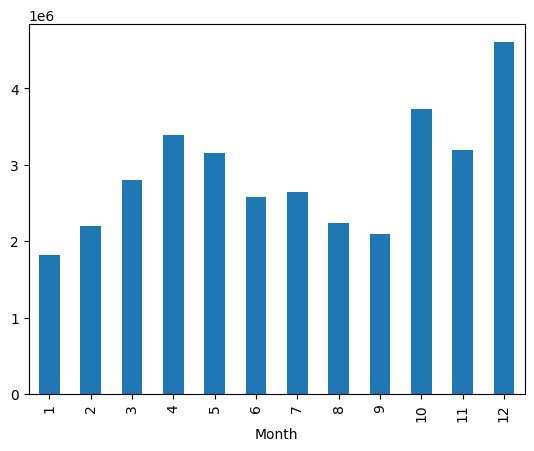

In [32]:
# Creates a bar plot displaying the total sales for each month by grouping the Pandas DataFrame 'all_data' by the 'Month' column and summing the 'sales' column within each group.
all_data.groupby(['Month'])['sales'].sum().plot(kind='bar')

## Interpretation
# Last month has the highest sale of the year!

# Order Purchased per City

In [33]:
all_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [34]:
all_data['Purchase Address'][0]

'917 1st St, Dallas, TX 75001'

In [35]:
all_data['Purchase Address'][0].split(',')[1]

' Dallas'

In [36]:
all_data['Purchase Address'].str.split(',')

0                    [917 1st St,  Dallas,  TX 75001]
2               [682 Chestnut St,  Boston,  MA 02215]
3            [669 Spruce St,  Los Angeles,  CA 90001]
4            [669 Spruce St,  Los Angeles,  CA 90001]
5               [333 8th St,  Los Angeles,  CA 90001]
                             ...                     
186845     [840 Highland St,  Los Angeles,  CA 90001]
186846    [216 Dogwood St,  San Francisco,  CA 94016]
186847       [220 12th St,  San Francisco,  CA 94016]
186848     [511 Forest St,  San Francisco,  CA 94016]
186849     [250 Meadow St,  San Francisco,  CA 94016]
Name: Purchase Address, Length: 185686, dtype: object

In [37]:
# Extracts the city name from the 'Purchase Address' column in the Pandas DataFrame 'all_data' by splitting the address using the ',' delimiter and retrieving the second element
all_data['Purchase Address'].str.split(',').str.get(1)

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: Purchase Address, Length: 185686, dtype: object

In [38]:
all_data['city'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [39]:
all_data['city']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: city, Length: 185686, dtype: object

In [40]:
pd.value_counts(all_data['city'])

city
San Francisco    44662
Los Angeles      29564
New York City    24847
Boston           19901
Atlanta          14863
Dallas           14797
Seattle          14713
Portland         12449
Austin            9890
Name: count, dtype: int64

<Axes: ylabel='count'>

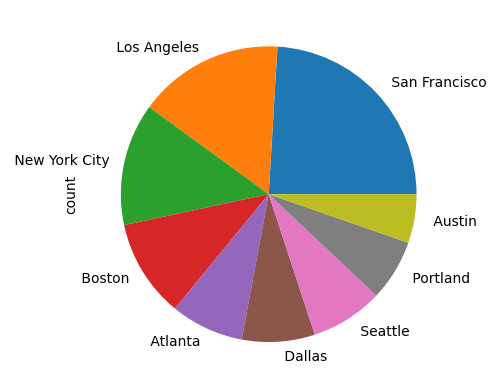

In [41]:
# Generates a pie chart representing the distribution of values in the 'city' column of the Pandas DataFrame 'all_data' using the Pandas 'value_counts' function.
pd.value_counts(all_data['city']).plot(kind='pie')

<Axes: ylabel='count'>

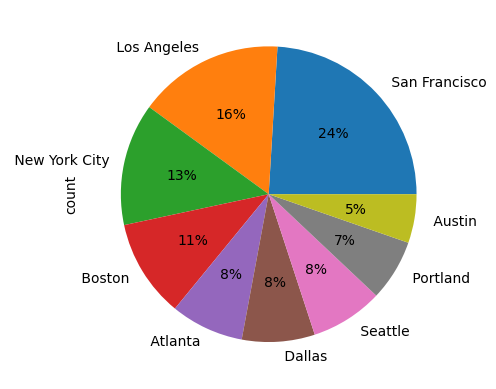

In [42]:
pd.value_counts(all_data['city']).plot(kind='pie', autopct='%1.0f%%')

# What products sold the most & why?

In [43]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'sales', 'city'],
      dtype='object')

In [44]:
# Creates a new DataFrame named 'count_df' by grouping the Pandas DataFrame 'all_data' by the 'Product' column and calculating the sum of 'Quantity Ordered' and the mean of 'Price Each' for each product.
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

In [45]:
count_df = count_df.reset_index()

In [46]:
count_df

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


In [47]:
products = count_df["Product"].values

Text(0, 0.5, 'Avg price of product')

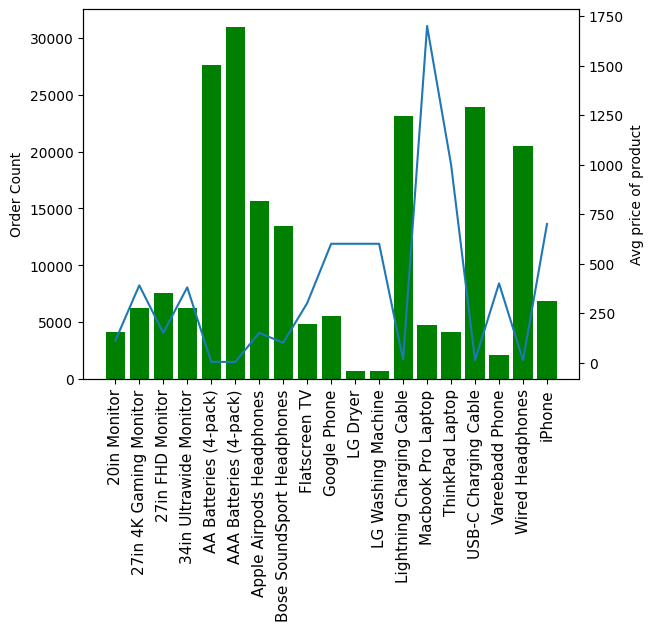

In [48]:
# Plots a bar chart and a line plot on the same figure using two y-axes ('ax1' and 'ax2'). The bar chart represents the total quantity ordered for each product, displayed on the left y-axis ('ax1'),
# while the line plot shows the average price of each product on the right y-axis ('ax2'). The x-axis labels are rotated vertically and set to a fontsize of 11. The left y-axis is labeled as 'Order Count,
# ' and the right y-axis is labeled as 'Avg price of product.'
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color='g')
ax2.plot(count_df['Product'], count_df['Price Each'])

ax1.set_xticklabels(products, rotation = 'vertical', fontsize=11)

ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

# Interpretation 

## We can see that Top selliung product is AAA Batteries (4-pack). It seems that top selling product has correlation with price of the products, cheaper the price higher the quantity ordered